<a href="https://colab.research.google.com/github/rmonterof/Scikit-learn/blob/main/1_4_regresi_n_polin_mica_random_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión polinómica

Ejemplo con datos random generados con Numpy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

<Axes: xlabel='input_feature', ylabel='target'>

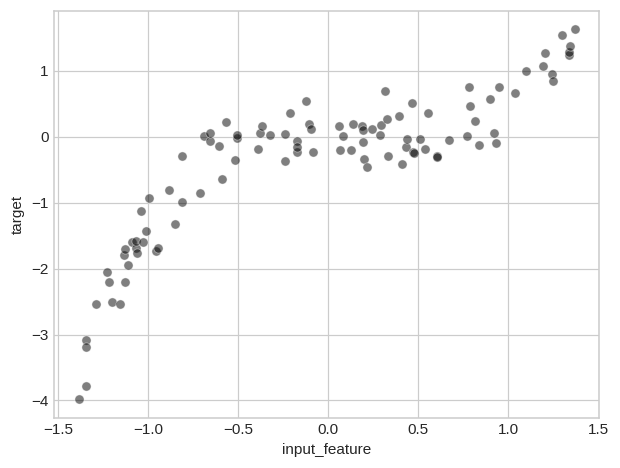

In [ ]:
rng = np.random.RandomState(0)
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise
full_data = pd.DataFrame({"input_feature": data, "target": target})
sns.scatterplot(data=full_data, x="input_feature", y="target",
                color="black", alpha=0.5)

In [ ]:
data.shape

(100,)

In [ ]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1,1))
data.shape

(100, 1)

In [ ]:
data.ndim

2

## 1. Regresión lineal

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(data, target)
target_predicted = linear_regression.predict(data)

In [ ]:
r2_score(target, target_predicted)

0.7145596810208774

In [ ]:
mse = mean_squared_error(target, target_predicted)
mse

0.36302830577099693

Text(0.5, 1.0, 'Mean squared error MSE = 0.36')

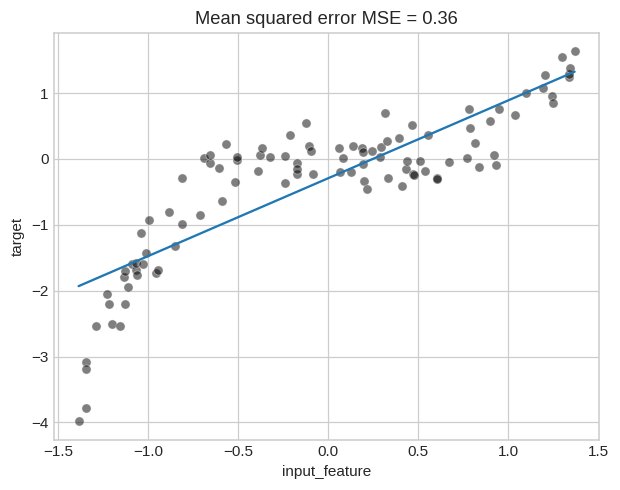

In [ ]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
ax.set_title(f"Mean squared error MSE = {mse:.2f}")

In [ ]:
rmse = np.sqrt(mean_squared_error(target, target_predicted))
rmse

np.float64(0.6025183032663796)

In [ ]:
mean_absolute_error(target, target_predicted)

0.4578252636473553

In [ ]:
print(f"weight: {linear_regression.coef_[0]:.2f}, "
      f"intercept: {linear_regression.intercept_:.2f}")

weight: 1.18, intercept: -0.29


## 2. Regresión polinómica

In [ ]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=4),
    LinearRegression(),
)

polynomial_regression.fit(data, target)
target_predicted = polynomial_regression.predict(data)
mse = mean_squared_error(target, target_predicted)
mse

0.08396723407443218

Text(0.5, 1.0, 'Mean squared error = 0.08')

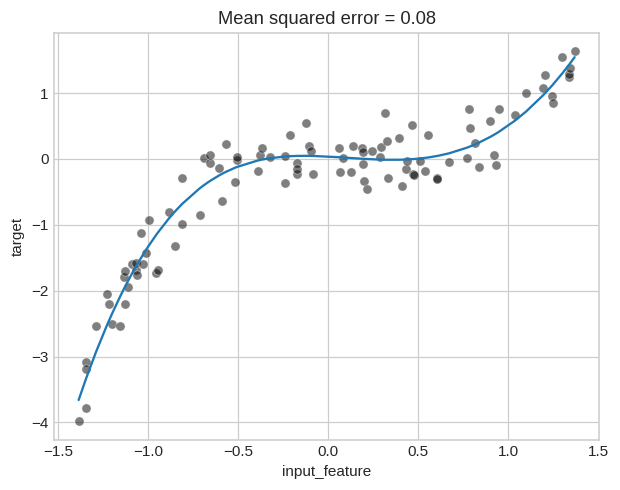

In [ ]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
ax.set_title(f"Mean squared error = {mse:.2f}")

In [ ]:
rmse = np.sqrt(mean_squared_error(target, target_predicted))
rmse

np.float64(0.289771002818488)

In [ ]:
r2_score(target, target_predicted)

0.9339786080121265

In [ ]:
mean_absolute_error(target, target_predicted)

0.2465627742955256